# Importarea librariilor si modulelor necesare

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# Afisarea efectiv a tuturor datelor,fara a lipsi vreo coloana
pd.set_option('display.max_columns', None)

In [2]:
#Incarcarea datelor
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

# Afisarea antetului din setul de train pentru verificare

In [3]:
#se vor afisa primele 5 linii cu toate caracteristicile necesare
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.62

In [4]:
#toate coloanele care au legatura cu repartizarea demografica si geografica
train.columns[13:82]
coloanele_geografie_demografice=train.columns[13:82].tolist()
coloanele_geografie_demografice

['Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.0,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.000000
patient_zip3,12906.0,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.000000
patient_age,12906.0,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.000000
bmi,3941.0,28.984539,5.696906,14.000000,24.660000,28.190000,32.920000,85.000000
population,12905.0,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.131580
...,...,...,...,...,...,...,...,...
veteran,12905.0,7.083376,3.109022,1.200000,4.929688,6.847059,8.620000,25.200000
Ozone,12877.0,39.822352,3.559492,30.939316,37.698880,39.108249,41.136513,52.237210
PM25,12877.0,7.475221,1.516499,2.636008,6.651215,7.686577,8.276922,11.169408
N02,12877.0,16.098988,5.842501,2.760371,11.280694,15.589148,20.801880,31.504775


# Prelucarea datelor

In [6]:
#Coloanele "categorical"
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


In [7]:
nr_linii=train.shape[0]
nr_coloane=train.shape[1]
print(f'Setul de date contine {nr_linii} de linii si {nr_coloane} de coloane')

Setul de date contine 12906 de linii si 83 de coloane


# Verificare si numarare valori lipsa din setul de date

In [8]:
#identificarea tuturor celulelor lipsa
total_lipsa=train.isnull().sum().sum()
#determinarea numarului total de celule
total_celule=train.size

In [9]:
#Afisarea procentului de date lipsa,indiferent de coloane
procent_lipsa=(total_lipsa/total_celule)*100
print(f'In total din {total_celule} celule, lipsesc {total_lipsa} celule care inseamna {procent_lipsa:.3f}% din total')

In total din 1071198 celule, lipsesc 43292 celule care inseamna 4.041% din total


# Verificare cate valori lipsesc pe fiecare coloana

In [10]:
for coloana in train.columns:
    nr_valori_lipsa = train[coloana].isna().sum()
    procent_lipsa = (nr_valori_lipsa / nr_linii) * 100
    print(f"Pentru coloana {coloana} numarul valorilor lipsa este:{nr_valori_lipsa} si procentul lipsa este: {procent_lipsa:.2f}%")

Pentru coloana patient_id numarul valorilor lipsa este:0 si procentul lipsa este: 0.00%
Pentru coloana patient_race numarul valorilor lipsa este:6385 si procentul lipsa este: 49.47%
Pentru coloana payer_type numarul valorilor lipsa este:1803 si procentul lipsa este: 13.97%
Pentru coloana patient_state numarul valorilor lipsa este:51 si procentul lipsa este: 0.40%
Pentru coloana patient_zip3 numarul valorilor lipsa este:0 si procentul lipsa este: 0.00%
Pentru coloana patient_age numarul valorilor lipsa este:0 si procentul lipsa este: 0.00%
Pentru coloana patient_gender numarul valorilor lipsa este:0 si procentul lipsa este: 0.00%
Pentru coloana bmi numarul valorilor lipsa este:8965 si procentul lipsa este: 69.46%
Pentru coloana breast_cancer_diagnosis_code numarul valorilor lipsa este:0 si procentul lipsa este: 0.00%
Pentru coloana breast_cancer_diagnosis_desc numarul valorilor lipsa este:0 si procentul lipsa este: 0.00%
Pentru coloana metastatic_cancer_diagnosis_code numarul valorilor 

In [11]:
#Importarea librariilor necesare pentru a construi si transforma modele folosind scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin

# Eliminarea coloanelor 

In [12]:
class DropColoana(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        
        return X.drop(self.cols, axis=1)

DropColoana(cols=['patient_race', 'payer_type', 'bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type']).fit_transform(train)

,patient_id,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,CA,924,84,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,CA,928,62,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,TX,760,43,F,C50112,Malignant neoplasm of central portion of left ...,C773,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,CA,926,45,F,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.623810,3.098095,54.564286,120533.83330,3.435714,1.273810,2.180952,2.211905,2.100000,4.380952,5.885714,10.897619,10.721429,18.850000,38.057143,56.907143,55336.28571,59.221429,12171.302330,1.012474e+06,2354.738095,32.03

# Gestionarea datelor lipsa

In [13]:
class DateLipsaImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategie='medie', coloane=None):
        self.strategie = strategie
        self.coloane = coloane

    def fit(self, X, y=None):
        if self.strategie == 'medie':
            if self.coloane is not None:
                self.fill_values = X[self.coloane].median()
            else:
                self.fill_values = X.mean()
        elif self.strategie == 'mod':
            if self.coloane is not None:
                self.fill_values = X[self.coloane].mode().iloc[0]
            else:
                self.fill_values = X.mode().iloc[0]
        return self

    def transform(self, X):
        if self.coloane is not None:
            X_copy = X.copy()
            X_copy[self.coloane] = X_copy[self.coloane].fillna(self.fill_values)
            return X_copy
        else:
            return X.fillna(self.fill_values)

In [14]:
coloane_categorical = train.select_dtypes(include=['object', 'category']).columns
coloane_numerice = train.select_dtypes(include=['float64', 'int64']).columns.drop('DiagPeriodL90D')

In [15]:
#Initializarea mediei pentru a putea completa coloanele lipsa,de tip numerical
medie_imputer = DateLipsaImputer(strategie='medie', coloane=coloane_numerice)

# Fit and transform the train and test data using the specified numerical columns
df_train_medie = medie_imputer.fit_transform(train)

In [16]:
df_train_medie.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.0,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.000000
patient_zip3,12906.0,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.000000
patient_age,12906.0,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.000000
bmi,12906.0,28.432622,3.169008,14.000000,28.190000,28.190000,28.190000,85.000000
population,12906.0,20744.318019,13886.372758,635.545455,9463.896552,19154.190480,30021.278690,71374.131580
...,...,...,...,...,...,...,...,...
veteran,12906.0,7.083358,3.108902,1.200000,4.929688,6.847059,8.620000,25.200000
Ozone,12906.0,39.820747,3.555652,30.939316,37.698880,39.108249,41.111066,52.237210
PM25,12906.0,7.475696,1.514827,2.636008,6.651215,7.686577,8.276922,11.169408
N02,12906.0,16.097842,5.835983,2.760371,11.280694,15.589148,20.801880,31.504775


In [17]:
#Initializarea 'modimputer' pentru a putea completa coloanele lipsa,de tip categorical
mod_imputer = DateLipsaImputer(strategie='mod', coloane=coloane_categorical)

##Transformarea setului train,mai precis coloanele categorical
df_train_mode = mod_imputer.fit_transform(train)

In [18]:
#coloane categorical
df_train_mode.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,12906,5,White,9973
payer_type,12906,3,COMMERCIAL,7835
patient_state,12906,50,CA,2489
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,12906,2,PEMBROLIZUMAB,12895
metastatic_first_novel_treatment_type,12906,1,Antineoplastics,12906
Region,12906,4,South,3971


# One Hot Encoder

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
#aplicarea transformatoarelor la diferite coloane
multicolumn_prep = ColumnTransformer([ ('encode', 
                                       OneHotEncoder(handle_unknown='ignore'), 
                                       coloane_categorical),
                                     ],
                                     remainder='passthrough')

multicolumn_prep


ColumnTransformer(remainder='passthrough',
                  transformers=[('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object'))])

# Inlocuire doublescores

In [21]:
class InlocuireDoubleUnderscores:
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.columns = X_copy.columns.str.replace('__', '_')
        return X_copy

# Redenumire coloane

In [22]:
class RedenumireColoane(BaseEstimator, TransformerMixin):
    def __init__(self, replace_dict):
        self.replace_dict = replace_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.columns = [col.translate(self.replace_dict) for col in X_copy.columns]
        return X_copy

In [23]:
dict_inlocuire = {ord('('): '_', ord(')'): '_', ord(':'): '_', ord(' '): '_', ord('['): '_', ord(']'): '_', ord(','): '_'}

# Gruparea coloane relevante

# Gruparea coloanei commute_time

In [24]:
class gruparect(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['commute_time'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_commute_time',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
gruparect(5).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut5_commute_time
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,2.0
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,3.0
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,3.0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.

# Gruparea coloanei patient_zip3

In [25]:
class gruparezip3(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['patient_zip3'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_patient_zip3',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
gruparezip3(10).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut10_patient_zip3
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,8
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,9
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,6
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.60476

# Gruparea coloanei patient_age

In [26]:
class gruparepa(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['patient_age'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_patient_age',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
gruparepa(7).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut7_patient_age
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,6
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,4
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,

# Gruparea coloanei ozone

In [27]:
class grupareozon(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['Ozone'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_Ozone',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
grupareozon(5).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut5_Ozone
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,4.0
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,4.0
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,3.0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,

# Gruparea coloanei pm25

In [28]:
class gruparepm25(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['PM25'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_PM25',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
gruparepm25(5).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut5_PM25
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,4.0
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,3.0
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,2.0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,1

# Gruparea coloanei N02

In [29]:
class gruparen02(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['N02'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_N02',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
gruparen02(5).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut5_N02
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,3.0
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,2.0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11

In [30]:
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


# Interactiunea coloanelor Breast Cancer Desc si Metastatic Cancer Code

In [31]:
class TransformareBCD_MCD(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['BC_MC_Interact'] = X_copy['breast_cancer_diagnosis_desc'] + '_' + X_copy['metastatic_cancer_diagnosis_code']
        return X_copy
    
TransformareBCD_MCD().fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,BC_MC_Interact
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,Malignant neoplasm of unsp site of unspecified...
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,Malig neoplm of upper-outer quadrant of right ...
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,Malignant neoplasm of central portion of left ...
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558

# Asamblarea pipe line-ului

In [32]:
from sklearn.pipeline import Pipeline

pipeline_preg = Pipeline([
    ('medieimputer', DateLipsaImputer(strategie='medie', coloane=coloane_numerice)), 
    ('modeimpute', DateLipsaImputer(strategie='mod', coloane=coloane_categorical)),
    ('GrupareZIP3', gruparezip3(10)),
    ('GrupareCT', gruparect(5)),
    ('GruparePA', gruparepa(10)),
    ('GrupareOzon', grupareozon(10)),
    ('GruparePM25', gruparepm25(10)),
    ('GrupareN02', gruparen02(10)),
    ('RelatiaBCD-MCC', TransformareBCD_MCD()),
     ('drop', DropColoana(cols=coloanele_geografie_demografice + ['patient_race', 'payer_type', 'bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type'])),
     ('prep', ColumnTransformer([
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False), 
         list(set(coloane_categorical).union(['QCut10_patient_zip3','QCut5_commute_time','QCut10_patient_age','QCut10_Ozone','QCut10_PM25','QCut10_N02','BC_MC_Interact'])
               - set(coloanele_geografie_demografice)-set(['patient_race', 'payer_type', 'bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type'])
             )) 
    ],
    remainder='passthrough').set_output(transform='pandas')),
    ('replacedouble', InlocuireDoubleUnderscores()),
    ('rename_columns', RedenumireColoane(dict_inlocuire))
])

pipeline_preg

Pipeline(steps=[('medieimputer',
                 DateLipsaImputer(coloane=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income',...
                                                   'breast_cancer_diagnosis_code',
                                                   'metastatic_cancer_diagnosis_code',
                                                   'BC_MC_Interact',
                                                   'QCut10_patient_age',
                                                   'QCut10_N02',
                                                   'breast_cancer_diagnosis_desc',
                                                   'QCut5_commute_time'])])),
                ('replacedouble',
                 <__main__.InlocuireDoubleUnderscores object at 0x000002573DE13050>),
                ('rename_columns',
                 RedenumireColoane(replace_dict={32: '_', 40: '_', 41: '_',
                                                 44: '_', 58: '_', 91: '_',
                                                 93: '_'}))])

In [33]:
X = train.drop(['DiagPeriodL90D'], axis=1) 
y = train['DiagPeriodL90D']

In [34]:
#verificam outputul in train df
df_train = pipeline_preg.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Columns: 814 entries, encode_QCut10_Ozone_0 to remainder_patient_age
dtypes: float64(811), int64(3)
memory usage: 80.2 MB


In [35]:
#verificam outputul in test df
df_test = pd.DataFrame(pipeline_preg.transform(test))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Columns: 814 entries, encode_QCut10_Ozone_0 to remainder_patient_age
dtypes: float64(811), int64(3)
memory usage: 36.0 MB


In [36]:
from sklearn.preprocessing import  StandardScaler,RobustScaler

#Se foloseste standard scaler pentru a scala valorile numerice,in mod standard

class ScalerStandard(StandardScaler, TransformerMixin):
    def afisare_features(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [37]:
#Dar de asemenea si in mod robust
class ScalerRobust(RobustScaler, TransformerMixin):
    def afisare_features(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [38]:
pipeline_modelat = Pipeline(pipeline_preg.steps + [('scale',StandardScaler().set_output(transform='pandas')),])
pipeline_modelat

Pipeline(steps=[('medieimputer',
                 DateLipsaImputer(coloane=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income',...
                                                   'metastatic_cancer_diagnosis_code',
                                                   'BC_MC_Interact',
                                                   'QCut10_patient_age',
                                                   'QCut10_N02',
                                                   'breast_cancer_diagnosis_desc',
                                                   'QCut5_commute_time'])])),
                ('replacedouble',
                 <__main__.InlocuireDoubleUnderscores object at 0x000002573DE13050>),
                ('rename_columns',
                 RedenumireColoane(replace_dict={32: '_', 40: '_', 41: '_',
                                                 44: '_', 58: '_', 91: '_',
                                                 93: '_'})),
                ('scale', StandardScaler())])

# Model XGBOOST

In [118]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

In [119]:
#Cei mai buni parametri pentru un model XGBoost
parametri_xgb = {'max_depth': 6, 
                     'min_child_weight': 5,
                     'max_delta_step': 5, 
                     'learning_rate': 0.01623064007788684, 
                     'n_estimators': 200, 
                     'subsample': 0.5, 
                     'gama':0.1,
                     'alpha':0.1,
                     'lambda':0.15,
                     'colsample_bytree': 0.6, 
                     'random_state': 42}

# XGBoost model
xgb_model = XGBClassifier(**parametri_xgb)

xgb_pipeline = make_pipeline(pipeline_modelat, xgb_model)
xgb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('medieimputer',
                                  DateLipsaImputer(coloane=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family...
                               feature_types=None, gama=0.1, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, lambda=0.15,
                               learning_rate=0.01623064007788684, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=5, max_depth=6, max_leaves=None,
                               min_child_weight=5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, ...))])

# Evaluarea modelului folosind F1 Score si AUC Score

F1 Score(masoara capacitatea modelului de a distinge intre exemplele pozitive si cele negative) si AUC Score(masoara capacitatea modelului de a distinge intre exemplele pozitive si cele negative) sunt doua metrici populare utilizate pentru a evalua modelele de clasificare. Un F1 Score de 1 indica o performanta perfecta, 0 fiind cea mai proasta. O valoare AUC de 1 indica o performanta perfecta, 0.5 fiind echivalenta cu o performanta aleatorie..

In [120]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score

In [121]:
#numarul de 'plieri'
n_plieri = 10

#  StratifiedKFold
strat_k = StratifiedKFold(n_splits=n_plieri, shuffle=True, random_state=42)

#  cross-validation results
rezultate_cross_validation = [] #se vor memora intr-o lista

# stratified k-fold cross-validation
#este o extensie a cross-validation kfold obișnuite, dar în special pentru problemele de clasificare
#plierile se realizează prin păstrarea procentului de probe pentru fiecare clasă

for pliere, (train_id, val_id) in enumerate(strat_k.split(X, y)):
    X_train, X_val = X.iloc[train_id], X.iloc[val_id]
    y_train, y_val = y[train_id], y[val_id]

    xgb_pipeline.fit(X_train, y_train)

    # predictii pe setul de validare
    y_val_pred_prob = xgb_pipeline.predict(X_val)
    y_pred = xgb_pipeline.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluarea modelului
    
    r_a = roc_auc_score(y_val, y_val_pred_prob)
    print(f'Plierea {pliere + 1}, scorul AUC pe setul de validare este: {r_a}')
    print(f'Plierea {pliere + 1}, scorul F1 pe setul de validare este: {f1}')
    print('\n')

    # results
    rezultate_cross_validation.append(r_a)

#media rezultatelor AUC 
medie_rezultate = sum(rezultate_cross_validation) / n_plieri
print(f'\nMedia AUC pentru {n_plieri} plieri este: {medie_rezultate}')

Plierea 1, scorul AUC pe setul de validare este: 0.7576782379575862
Plierea 1, scorul F1 pe setul de validare este: 0.7957726709751144


Plierea 2, scorul AUC pe setul de validare este: 0.7461372182855388
Plierea 2, scorul F1 pe setul de validare este: 0.7857183562752161


Plierea 3, scorul AUC pe setul de validare este: 0.7638727584354456
Plierea 3, scorul F1 pe setul de validare este: 0.8021857777344131


Plierea 4, scorul AUC pe setul de validare este: 0.7587181192601878
Plierea 4, scorul F1 pe setul de validare este: 0.7975253329764885


Plierea 5, scorul AUC pe setul de validare este: 0.7465477987260495
Plierea 5, scorul F1 pe setul de validare este: 0.7859482190172679


Plierea 6, scorul AUC pe setul de validare este: 0.7646939193164667
Plierea 6, scorul F1 pe setul de validare este: 0.802587163550081


Plierea 7, scorul AUC pe setul de validare este: 0.7586643561716876
Plierea 7, scorul F1 pe setul de validare este: 0.7975185363762707


Plierea 8, scorul AUC pe setul de validare

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix


Matricea de confuzie:

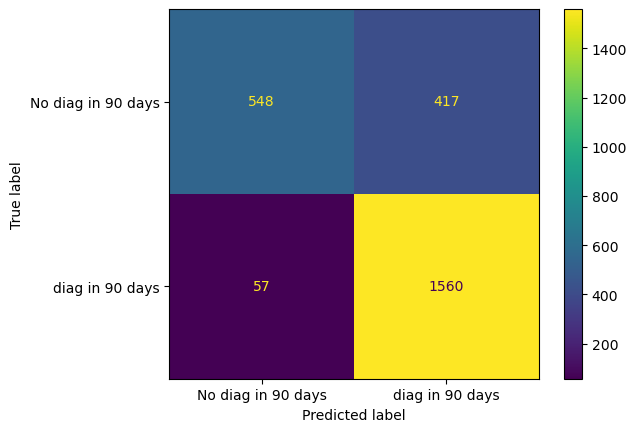

In [123]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_pipeline.fit(X = X_train, y = y_train)

predictions_xgb = xgb_pipeline.predict(X_val)

cm_xgb = confusion_matrix(y_val, predictions_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No diag in 90 days', 'diag in 90 days'])
disp.plot()
plt.show()

# Model LGBM 

In [129]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [130]:
##Cei mai buni parametri pentru un model LGBM
param_lgbm =  {'max_depth': 7,
               'num_leaves': 64,
               'force_row_wise':True,
                       'min_child_samples': 25, 
                       'learning_rate': 0.001176435844599707, 
                       'n_estimators': 425, 
                       'subsample': 0.70242, 
                       'colsample_bytree': 0.7, 
                       'reg_alpha': 0.05, 
                       'reg_lambda': 0.05,
                       'verbose': -1} #acest parametru setat la -1 nu permite afisarea de informatii in timpul antrenarii
                                        #pe masura ce se desfasoara
    
# lgbm model
lgbm_model = LGBMClassifier(**param_lgbm)

pipeline_lgbm = make_pipeline(pipeline_modelat, lgbm_model)
pipeline_lgbm

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('medieimputer',
                                  DateLipsaImputer(coloane=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family...
                                  RedenumireColoane(replace_dict={32: '_',
                                                                  40: '_',
                                                                  41: '_',
                                                                  44: '_',
                                                                  58: '_',
                                                                  91: '_',
                                                                  93: '_'})),
                                 ('scale', StandardScaler())])),
                ('lgbmclassifier',
                 LGBMClassifier(colsample_bytree=0.7, force_row_wise=True,
                                learning_rate=0.001176435844599707, max_depth=7,
                                min_child_samples=25, n_estimators=425,
                                num_leaves=64, reg_alpha=0.05, reg_lambda=0.05,
                                subsample=0.70242, verbose=-1))])

In [131]:
from sklearn.metrics import log_loss

In [132]:
# plieri
n_plieri = 10

# StratifiedKFold
strat_k = StratifiedKFold(n_splits=n_plieri, shuffle=True, random_state=42)

rezultate_AUC=[]


for pliere, (train_id, val_id) in enumerate(strat_k.split(X, y)):
    warnings.filterwarnings('ignore')
    X_train, X_val = X.iloc[train_id], X.iloc[val_id]
    y_train, y_val = y[train_id], y[val_id]

    pipeline_lgbm.fit(X_train,y_train)

    y_val_pred_prob = pipeline_lgbm.predict_proba(X_val)
    y_pred = pipeline_lgbm.predict(X_val)
        
    f1=f1_score(y_val, y_pred, average='weighted')

    # Evaluarea modelului
    logloss = log_loss(y_val, y_val_pred_prob)
    r_a = roc_auc_score(y_val, y_pred)
    print(f'Plierea {pliere + 1}, scorul AUC pe setul de validare este: {r_a}')
    print(f'Plierea {pliere + 1}, scorul F1 pe setul de validare este {f1}')
    print(f'Plierea {pliere + 1}, Pierderea logaritmica pe setul de validarea este: {logloss}')
    print('\n')

    rezultate_AUC.append(r_a)
medie_rezultat = sum(rezultate_AUC) / n_plieri
print(f'\nMedia AUC din{n_plieri} plieri este: {medie_rezultat}')

Plierea 1, scorul AUC pe setul de validare este: 0.756236729682024
Plierea 1, scorul F1 pe setul de validare este 0.7946314745275536
Plierea 1, Pierderea logaritmica pe setul de validarea este: 0.5536653679052741


Plierea 2, scorul AUC pe setul de validare este: 0.7461372182855388
Plierea 2, scorul F1 pe setul de validare este 0.7857183562752161
Plierea 2, Pierderea logaritmica pe setul de validarea este: 0.5607588994636021


Plierea 3, scorul AUC pe setul de validare este: 0.7638727584354456
Plierea 3, scorul F1 pe setul de validare este 0.8021857777344131
Plierea 3, Pierderea logaritmica pe setul de validarea este: 0.5529127479830888


Plierea 4, scorul AUC pe setul de validare este: 0.7556253357550333
Plierea 4, scorul F1 pe setul de validare este 0.7947134131636249
Plierea 4, Pierderea logaritmica pe setul de validarea este: 0.5523236069570184


Plierea 5, scorul AUC pe setul de validare este: 0.7465477987260495
Plierea 5, scorul F1 pe setul de validare este 0.7859482190172679
Pli

Matricea de confuzii:

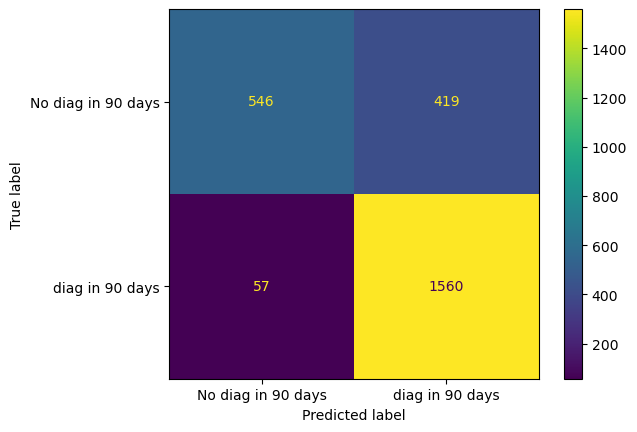

In [133]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_lgbm.fit(X = X_train,
                y = y_train)

predictii_lgbm = pipeline_lgbm.predict(X_val)

mc_lgbm = confusion_matrix(y_val, predictii_lgbm)

disp = ConfusionMatrixDisplay(confusion_matrix=mc_lgbm, display_labels=['No diag in 90 days', 'diag in 90 days'])
disp.plot()
plt.show()

# Model CATBOOST

In [134]:
from catboost import CatBoostClassifier

In [135]:
#Cei mai buni parametri pentru un model catboost
param_catboost = {'iterations': 1000, 
                          'max_depth': 5, 
                          'min_data_in_leaf': 47, 
                          'learning_rate': 0.0038741132693241795, 
                          'l2_leaf_reg': 0.24955843591450432, 
                          'border_count': 155, 
                          'subsample': 0.7401131867566202,
                          'colsample_bylevel': 0.29684187768021997}
# catboost model
cb_model = CatBoostClassifier(**param_catboost ,random_state=42, verbose=0)


pipeline_cb = make_pipeline(pipeline_modelat, cb_model)
pipeline_cb

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('medieimputer',
                                  DateLipsaImputer(coloane=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family...
                                                                    'breast_cancer_diagnosis_desc',
                                                                    'QCut5_commute_time'])])),
                                 ('replacedouble',
                                  <__main__.InlocuireDoubleUnderscores object at 0x000002573DE13050>),
                                 ('rename_columns',
                                  RedenumireColoane(replace_dict={32: '_',
                                                                  40: '_',
                                                                  41: '_',
                                                                  44: '_',
                                                                  58: '_',
                                                                  91: '_',
                                                                  93: '_'})),
                                 ('scale', StandardScaler())])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000002570029C610>)])

Si in cazul unui model de tip CATBOOST se va face analiza tot pentru 10 plieri

In [136]:
from sklearn.metrics import log_loss

In [137]:
n_plieri = 10

strat_k = StratifiedKFold(n_splits=n_plieri, shuffle=True, random_state=42)


rezultate_F1= []
rezultate_AUC = []


for pliere, (train_id, val_id) in enumerate(strat_k.split(X, y)):
    X_train, X_val = X.iloc[train_id], X.iloc[val_id]
    y_train, y_val = y[train_id], y[val_id]

    
    pipeline_cb.fit(X_train,y_train)
    
    y_val_pred_prob = pipeline_cb.predict_proba(X_val)
    y_pred = pipeline_cb.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    #Evaluarea modelului,dar acum este prezenta si pierderea logaritmica la fiecare pliere
    logloss = log_loss(y_val, y_val_pred_prob)
    r_a = roc_auc_score(y_val, y_pred)
    print(f'Plierea {pliere + 1}, scorul AUC pe setul de validare este: {r_a}')
    print(f'Plierea {pliere + 1}, scorul F1 pe setul de validare este: {f1}')
    print(f'Plierea {pliere + 1}, Pierderea logaritmica pe setul de validarea este:{logloss}')
    print('\n')

 
    rezultate_F1.append(logloss)
    rezultate_AUC.append(r_a)

medie_F1 = sum(rezultate_F1) / n_plieri
medie_AUC = sum(rezultate_AUC) / n_plieri


print(f'\nMedia scorului F1 pentru {n_plieri} plieri este: {medie_F1}')
print(f'\nMedia scorului AUC pentru {n_plieri} plieri este: {medie_AUC}')

Plierea 1, scorul AUC pe setul de validare este: 0.7580888183980968
Plierea 1, scorul F1 pe setul de validare este: 0.7959792024973639
Plierea 1, Pierderea logaritmica pe setul de validarea este:0.47547307465238936


Plierea 2, scorul AUC pe setul de validare este: 0.7506715100662557
Plierea 2, scorul F1 pe setul de validare este: 0.789726694455049
Plierea 2, Pierderea logaritmica pe setul de validarea este:0.48592896424160076


Plierea 3, scorul AUC pe setul de validare este: 0.7632524110409045
Plierea 3, scorul F1 pe setul de validare este: 0.801459510824166
Plierea 3, Pierderea logaritmica pe setul de validarea este:0.4720395381028094


Plierea 4, scorul AUC pe setul de validare este: 0.762221483205853
Plierea 4, scorul F1 pe setul de validare este: 0.8005304285941154
Plierea 4, Pierderea logaritmica pe setul de validarea este:0.4707615356760549


Plierea 5, scorul AUC pe setul de validare este: 0.7486096543961526
Plierea 5, scorul F1 pe setul de validare este: 0.7878401665680488
Pl

Matricea de confuzie:

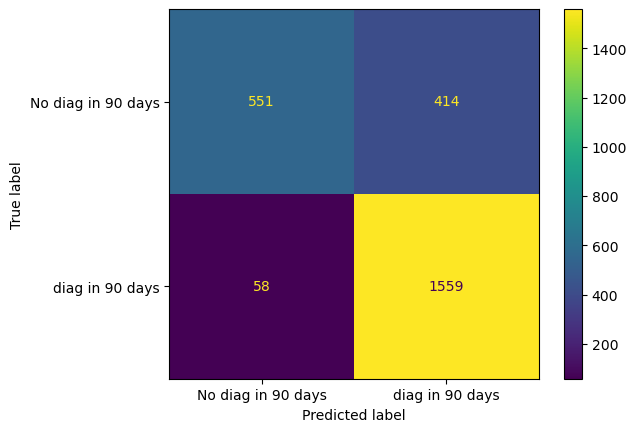

In [138]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_cb.fit(X = X_train, y = y_train)

predictii_cb = pipeline_cb.predict(X_val)

mc_cb = confusion_matrix(y_val, predictii_cb)

disp = ConfusionMatrixDisplay(confusion_matrix=mc_cb, display_labels=['No diag in 90 days', 'diag in 90 days'])
disp.plot()
plt.show()


# Evaluarea finala

In [139]:
from sklearn.inspection import permutation_importance

# Importanta feature-lor

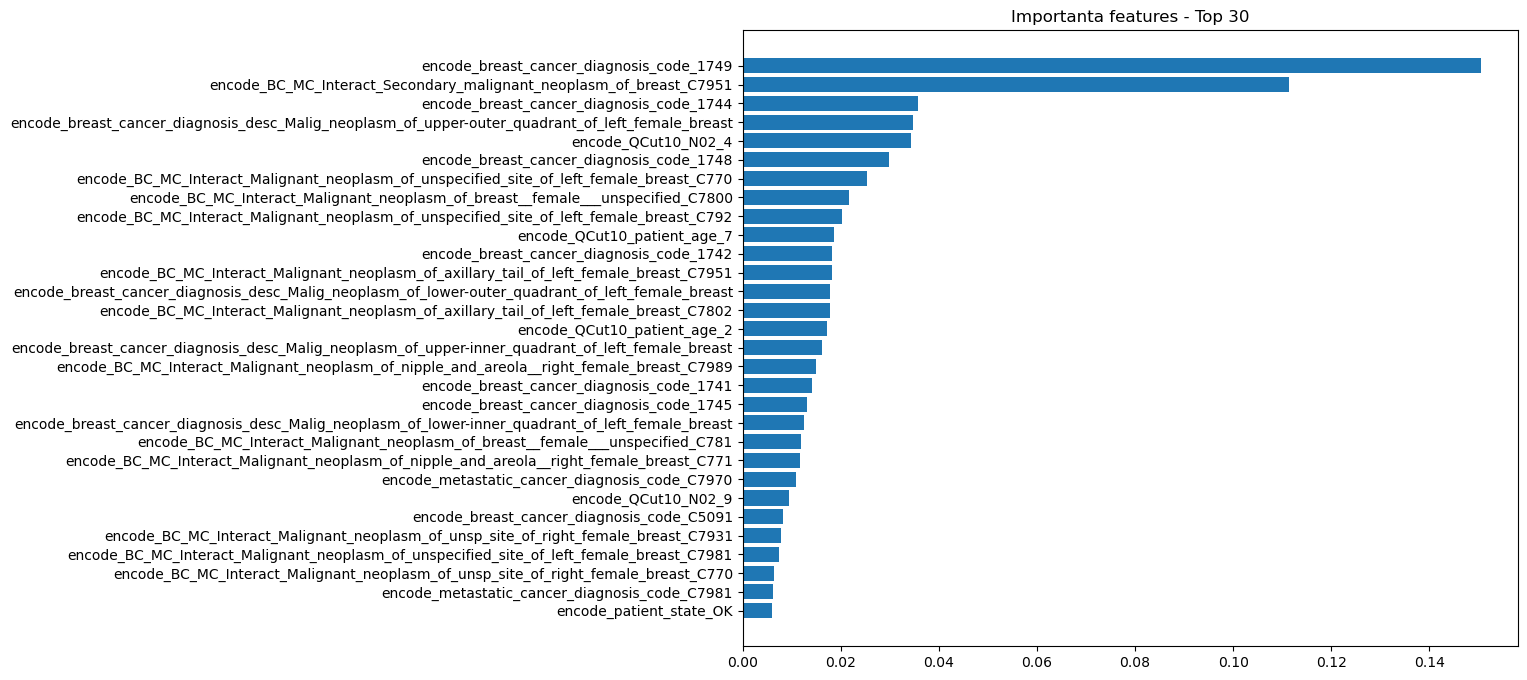

In [140]:
nr_importante = 30

importanta = xgb_model.feature_importances_

# Numele features din train
nume_features = df_train.columns

# Sortarea celor mai importante si obtinerea indicilor din array-ul sortat
sortat = np.argsort(importanta)

# Se ploteaza doar cele mai importante
fig = plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(sortat))[-nr_importante:], importanta[sortat][-nr_importante:], align='center')
plt.yticks(np.arange(len(sortat))[-nr_importante:], nume_features[sortat][-nr_importante:])
plt.title(f'Importanta features - Top {nr_importante}')
plt.show()
#se vor afisa: 30 cele mai importante features

# Asamblarea si completarea fisierului de submission

In [141]:
from sklearn.ensemble import VotingClassifier

In [142]:
model_asamblat = VotingClassifier(estimators=[
    ('xgb', xgb_pipeline),
    ('lgbm', pipeline_lgbm),
    ('cb', pipeline_cb)
        
]
                                  , voting='soft', #In votarea soft, fiecare estimator de bază prezice distribuția probabilității pe toate clasele. 
                                  #Predicția finală este determinată prin medierea acestor probabilități și apoi selectarea clasei cu cea mai mare probabilitate medie.
                                  weights = [0.3, 0.4,0.3]) 

model_asamblat

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('medieimputer',
                                                                DateLipsaImputer(coloane=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorce...
                                                                                                  'QCut5_commute_time'])])),
                                                               ('replacedouble',
                                                                <__main__.InlocuireDoubleUnderscores object at 0x000002573DE13050>),
                                                               ('rename_columns',
                                                                RedenumireColoane(replace_dict={32: '_',
                                                                                                40: '_',
                                                                                                41: '_',
                                                                                                44: '_',
                                                                                                58: '_',
                                                                                                91: '_',
                                                                                                93: '_'})),
                                                               ('scale',
                                                                StandardScaler())])),
                                              ('catboostclassifier',
                                               <catboost.core.CatBoostClassifier object at 0x000002570029C610>)]))],
                 voting='soft', weights=[0.3, 0.4, 0.3])

In [143]:
# Fitarea modelului final
model_asamblat.fit(X, y)

# Crearea unui fisier de submission cu probabilitatea de predictie
predictii = model_asamblat.predict_proba(test)[:, 1]  # se folosesc probabilitatile primei clase

sample_submission['DiagPeriodL90D'] = predictii
sample_submission.to_csv('submission_ensemble.csv', index=False)

In [145]:
sample_submission.head()

,patient_id,DiagPeriodL90D
0,573710,0.738815
1,593679,0.724010
2,184532,0.742417
3,447383,0.737751
4,687972,0.727044
